# Image Classification using Tensorflow

In [96]:
from __future__ import absolute_import, division, print_function
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Other Libraries
import numpy as np
import matplotlib.pyplot as plt

In [97]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


## Loading the data:

In [98]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [99]:
# Mapping images into classes:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring the data:

In [100]:
print(train_images.shape)
#Each Label is between 0-9
print(train_labels)
test_images.shape

(60000, 28, 28)
[9 0 0 ... 3 0 5]


(10000, 28, 28)

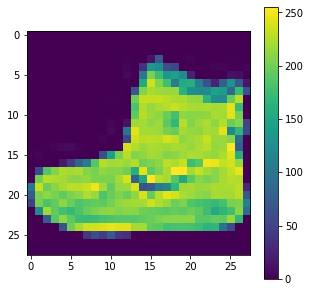

In [101]:
plt.figure(figsize = (5,5))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.


In [102]:
# Scaling the image from 0 - 1 to feed into NN
train_images = train_images / 255.0
test_images = test_images / 255.0

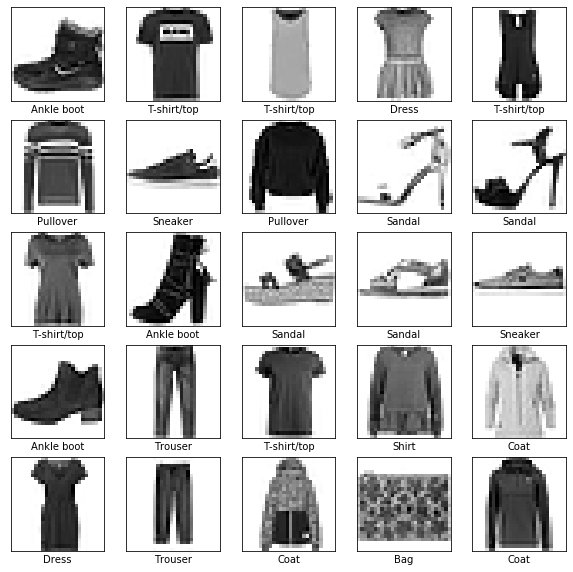

In [104]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # this binary will convert the image to 0 and 1. So no colours in image.
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the NN layers:

In [88]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [89]:
# Compile the model:
model.compile(optimizer = "adam", 
             loss = "sparse_categorical_crossentropy", 
             metrics = ["accuracy"])

In [90]:
# Model training:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4971 - acc: 0.8228
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3730 - acc: 0.8659
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3355 - acc: 0.8773
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3121 - acc: 0.8855
Epoch 5/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2945 - acc: 0.8904
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2801 - acc: 0.8960
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2666 - acc: 0.9016
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2570 - acc: 0.9055
Epoch 9/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2464 - acc: 0.9078
Epoch 10/10
60000/60000 [==============================] - 4s 65us/sample - loss: 

In [86]:
# Evaluating the accuracy: 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3921 - acc: 0.8678
Test accuracy: 0.8678


## Making Prediction:

In [48]:
predictions = model.predict(test_images)
predictions[0]

array([2.6162099e-06, 1.5456490e-07, 2.2176492e-07, 5.4332020e-07,
       3.0191497e-06, 5.1668164e-04, 1.4165573e-05, 2.4900038e-02,
       2.2836796e-08, 9.7456247e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the “confidence” of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value.

In [56]:
np.argmax(predictions[0])
#Model is most confident that it's an ankle boot. Let's see if it's correct

9

In [57]:
test_labels[0]

9

In [60]:
img[0]

NameError: name 'img' is not defined

In [61]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

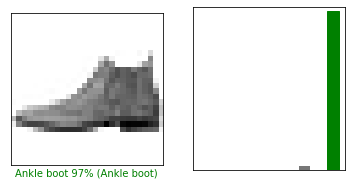

In [63]:
# checking for image 0
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

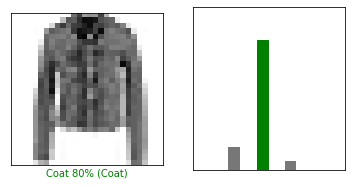

In [64]:
# Checking for image 10
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

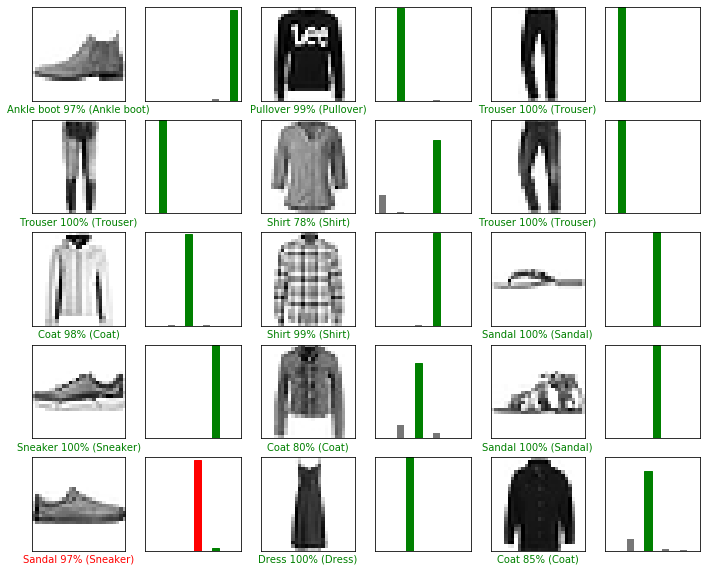

In [73]:
# Let's plot some of the images and their prediction accuracy
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [74]:
#Using the trained model to predict a single image
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img) 
print(predictions_single)

(28, 28)
(1, 28, 28)
[[2.6162077e-06 1.5456521e-07 2.2176495e-07 5.4332082e-07 3.0191502e-06
  5.1668275e-04 1.4165587e-05 2.4900023e-02 2.2836799e-08 9.7456259e-01]]


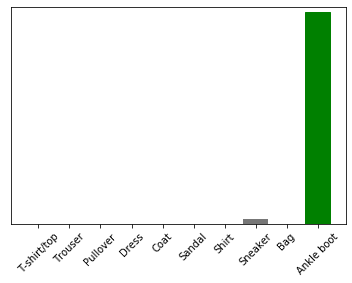

In [75]:
#ploting the accuracy for image 0
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [69]:
prediction_result = np.argmax(predictions_single[0])

In [70]:
prediction_result

9